<a href="https://colab.research.google.com/github/rafaelbuzi/plotly/blob/main/obitos_transito_infosiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizando os dados de óbitos no trânsito do Litoral Norte com *Plotly*

In [14]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import numpy as np

## Carregamento dos dados e ajustes iniciais

O **Infosiga** é um sistema de monitoramento de acidentes de trânsito do Governo do Estado de São Paulo. Desta forma, utilizaremos os dados de óbitos no trânsito para as visualizações.

Os dados podem ser obtidos no link abaixo:

*http://painelderesultados.infosiga.sp.gov.br/dados.web/ViewPage.do?id=8a48260b71775130017178b7082200c5*

In [15]:
df = pd.read_csv('obitos_publico.csv', sep=';', encoding='latin1', decimal=',')

In [16]:
cols = ['Data do Óbito', 'Turno','Município', 'LAT_(GEO)', 'LONG_(GEO)', 'Tipo do veículo da vítima', 'Tipo de vítima', 'Local do óbito',
       'Tipo de acidente', 'Idade da vítima', 'Mês do Óbito', 'Ano do Óbito', 'Ano/Mês do Óbito', 'Dia da Semana', 'Faixa etária', 'Sexo']


df = df[cols]

In [17]:
df.columns = map(str.lower, df.columns)

In [18]:
cond_1 = df.município=='CARAGUATATUBA'
cond_2 = df.município=='ILHABELA'
cond_3 = df.município=='SAO SEBASTIAO'
cond_4 = df.município=='UBATUBA'

df = df[cond_1 | cond_2 | cond_3 | cond_4]

In [19]:
df['data do óbito'] = pd.to_datetime(df['data do óbito'])

In [20]:
df = df.replace({',':'.'}, regex=True)

Criando *dataframe* contendo as datas contendo óbitos somente de Janeiro a Setembro.

In [21]:
jan_set = df[df['mês do óbito']<=9]

## Agrupamento de Óbitos pelo Litoral Norte

In [22]:
group_ln = jan_set.groupby([jan_set['data do óbito'].dt.year])['município'].count().reset_index(name="qtde")

In [23]:
array = np.vstack((group_ln['qtde'])).reshape(1,8)

In [24]:
title = 'Main Source for News'
labels = ['Litoral Norte']
colors = ['rgb(0,0,0)']

mode_size = [12]
line_size = [4]

x_data = np.vstack((np.arange(2015, 2023),)*1)

y_data = array

fig = go.Figure()

for i in range(0, 1):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(y_trace[-1]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Evolução dos Óbitos no Litoral Norte de SP (Jan/Set)',
                              font=dict(family='Arial',
                                        size=22,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fonte: INFOSIGA | Governo do Estado de SP ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

## Agrupamento por municípios do Litoral Norte

In [25]:
group = jan_set.groupby([jan_set['data do óbito'].dt.year, 'município'])['município'].count().reset_index(name="qtde")

Criando um *array* para o **plotly**:

In [26]:
a1 = np.array(group[group.município=='CARAGUATATUBA']['qtde'])
a2 = np.array(group[group.município=='ILHABELA']['qtde'])
a3 = np.array(group[group.município=='SAO SEBASTIAO']['qtde'])
a4 = np.array(group[group.município=='UBATUBA']['qtde'])
array = np.vstack((a1, a2, a3, a4))
array

array([[12, 14, 10, 13,  7, 12, 13, 16],
       [ 1,  3,  4,  1,  1,  2,  1,  4],
       [11, 11, 13,  6,  9,  7, 13, 11],
       [14, 14, 10, 17, 11, 11, 13, 16]])

In [27]:
import plotly.graph_objects as go
import numpy as np

title = 'Main Source for News'
labels = ['Caraguatatuba', 'Ilhabela', 'São Sebastião', 'Ubatuba']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

x_data = np.vstack((np.arange(2015, 2023),)*4)

y_data = array

fig = go.Figure()

for i in range(0, 4):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=13),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(y_trace[-1]),
                                  font=dict(family='Arial',
                                            size=13),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Evolução dos Óbitos por cidade do Litoral Norte de SP (Jan/Set)',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fonte: INFOSIGA | Governo do Estado de SP ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

## Evolução dos Óbitos *per capita* por cidade do Litoral Norte

Deste modo, precisaremos baixar o conjunto de dados que contém as estimativas populacionais ano a ano por cidade do Brasil. O arquivo está disponível para download no link abaixo:

**https://sidra.ibge.gov.br/tabela/6579**

In [29]:
pop = pd.read_excel('tabela6579.xlsx')
pop.dropna(inplace=True)

In [30]:
pop.columns = ['cidade', 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [31]:
pop[2022] = pop[2021]

In [32]:
pop = pd.melt(pop, id_vars=['cidade'], var_name='ano', value_name='populacao')

In [33]:
cond_1 = pop.cidade=='Caraguatatuba (SP)'
cond_2 = pop.cidade=='Ilhabela (SP)'
cond_3 = pop.cidade=='São Sebastião (SP)'
cond_4 = pop.cidade=='Ubatuba (SP)'

pop = pop[cond_1 | cond_2 | cond_3 | cond_4]

In [34]:
pop.replace({'cidade' : { 'Caraguatatuba (SP)' : 'CARAGUATATUBA', 
                         'Ilhabela (SP)' : 'ILHABELA', 'São Sebastião (SP)' : 'SAO SEBASTIAO',
                        'Ubatuba (SP)': 'UBATUBA'}}, inplace=True)

In [35]:
pop['populacao'] = pop['populacao'].astype(int)

In [36]:
per_capita = group.merge(pop, left_on = ['data do óbito', 'município'], right_on = ['ano', 'cidade'])

#Cálculo da taxa de óbitos per capita a cada 100.000 habitantes
per_capita['per_capita'] = round(per_capita.qtde/per_capita.populacao*100000,2)

In [37]:
a1 = np.array(per_capita[per_capita.município=='CARAGUATATUBA']['per_capita'])
a2 = np.array(per_capita[per_capita.município=='ILHABELA']['per_capita'])
a3 = np.array(per_capita[per_capita.município=='SAO SEBASTIAO']['per_capita'])
a4 = np.array(per_capita[per_capita.município=='UBATUBA']['per_capita'])
array = np.vstack((a1, a2, a3, a4))

In [38]:
import plotly.graph_objects as go
import numpy as np

title = 'Óbitos Per Capita'
labels = ['Caraguatatuba', 'Ilhabela', 'São Sebastião', 'Ubatuba']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

x_data = np.vstack((np.arange(2015, 2023),)*4)

y_data = array

fig = go.Figure()

for i in range(0, 4):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=13),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(y_trace[-1]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Evolução dos Óbitos per capita por cidade do Litoral Norte de SP (Jan/Set)',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fonte: INFOSIGA | Governo do Estado de SP ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

# Óbitos por Dia da Semana e Período

In [39]:
df['dia_da_semana_turno'] = df['dia da semana'] + ' - ' + df['turno']

In [40]:
obitos_dia_da_semana = df.groupby(['dia_da_semana_turno'])['dia_da_semana_turno'].count().reset_index(name='qtde').sort_values(by='qtde',ascending=False)

In [41]:
obitos_dia_da_semana.columns = ['dia_turno', 'qtde']

In [42]:
obitos_dia_da_semana['percent'] = round(obitos_dia_da_semana.qtde / obitos_dia_da_semana.qtde.sum()*100,1)

In [43]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(obitos_dia_da_semana.columns),
                fill_color='black',
                align='center', font=dict(color='white', family='Consolas', size=20)),
    cells=dict(values=[obitos_dia_da_semana.dia_turno,obitos_dia_da_semana.qtde, obitos_dia_da_semana.percent],
               fill_color='white',
               align='center', font=dict(color='black', family='Consolas', size=14)))
])
fig.show()

## Óbitos por Gênero desde 2015

In [44]:
group =  df.groupby('sexo')['sexo'].count().reset_index(name='qtde')

In [45]:
fig = px.bar(group, x='sexo', y='qtde', text_auto=True, color='qtde', color_continuous_scale='greys')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=14,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Óbitos por Gênero desde 2015 no Litoral Norte de SP',
                              font=dict(family='Arial',
                                        size=22,
                                        color='rgb(37,37,37)'),
                              showarrow=False))


fig.update_layout(annotations=annotations)
fig.show()

## Óbitos por Veículo da Vítima desde 2015

In [46]:
group =  df.groupby('tipo do veículo da vítima')['tipo do veículo da vítima'].count().reset_index(name='qtde')

In [47]:
fig = px.bar(group, x='tipo do veículo da vítima', y='qtde', text_auto=True, color='qtde', color_continuous_scale='greys')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=11,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Óbitos por Tipo de Veículo da Vítima desde 2015 no Litoral Norte de SP',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))


fig.update_layout(annotations=annotations)
fig.show()

## Óbitos por Faixa Etária da Vítima desde 2015

In [48]:
group =  df.groupby('faixa etária')['faixa etária'].count().reset_index(name='qtde')

In [49]:
fig = px.bar(group, x='faixa etária', y='qtde', text_auto=True, color='qtde', color_continuous_scale='greys')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=13,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Óbitos por Faixa Etária desde 2015 no Litoral Norte de SP',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))


fig.update_layout(annotations=annotations)
fig.show()

## Tratando os Dados Geográficos

In [53]:
%pip install geopandas
%pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 11.8 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [55]:
lat_long = df[df['lat_(geo)']!="NAO DISPONIVEL"][['lat_(geo)', 'long_(geo)']]
lat_long['lat_(geo)'] = lat_long['lat_(geo)'].astype(float)
lat_long['long_(geo)'] = lat_long['long_(geo)'].astype(float)

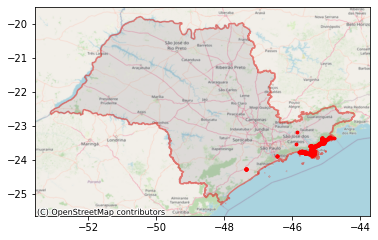

In [58]:
geometry = [Point(xy) for xy in zip(lat_long['long_(geo)'],lat_long['lat_(geo)'])]
wardlink = "SP_UF_2021.shp"
ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)


ward.crs = ('epsg', '4326')
geo_df.crs = ('epsg', '4326')

# plot the polygon
ax = ward.plot(alpha=0.1, color='#242a47', zorder=1)

ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 8, color = 'red',marker = 'o', zorder=3, figsize=(20,20))

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()